# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
fifa["ValueNumeric"] = pd.to_numeric(fifa["Value"].str.replace("[^0-9.]",""))

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18207 non-null  object 
 1   Age             18207 non-null  int64  
 2   Nationality     18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Potential       18207 non-null  int64  
 5   Club            17966 non-null  object 
 6   Value           18207 non-null  object 
 7   Preferred Foot  18159 non-null  object 
 8   Position        18147 non-null  object 
 9   Weak Foot       18159 non-null  float64
 10  Acceleration    18159 non-null  float64
 11  SprintSpeed     18159 non-null  float64
 12  Stamina         18159 non-null  float64
 13  Strength        18159 non-null  float64
 14  LongShots       18159 non-null  float64
 15  Aggression      18159 non-null  float64
 16  Interceptions   18159 non-null  float64
 17  Positioning     18159 non-null 

In [6]:
fifa["ValueNumeric"].value_counts()

1.1      431
375.0    372
425.0    354
325.0    351
450.0    343
        ... 
45.5       1
81.0       1
53.5       1
61.0       1
72.0       1
Name: ValueNumeric, Length: 210, dtype: int64

In [7]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            18207 non-null  object 
 1   Age             18207 non-null  int64  
 2   Nationality     18207 non-null  object 
 3   Overall         18207 non-null  int64  
 4   Potential       18207 non-null  int64  
 5   Club            17966 non-null  object 
 6   Value           18207 non-null  object 
 7   Preferred Foot  18159 non-null  object 
 8   Position        18147 non-null  object 
 9   Weak Foot       18159 non-null  float64
 10  Acceleration    18159 non-null  float64
 11  SprintSpeed     18159 non-null  float64
 12  Stamina         18159 non-null  float64
 13  Strength        18159 non-null  float64
 14  LongShots       18159 non-null  float64
 15  Aggression      18159 non-null  float64
 16  Interceptions   18159 non-null  float64
 17  Positioning     18159 non-null 

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [8]:
fifa.rename(columns={"Preferred Foot": "Preferred_Foot"}, inplace = True)

In [9]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [10]:
model = ols(formula = 'fifa["ValueNumeric"]~C(fifa["Preferred_Foot"], Sum)+C(fifa["Position"], Sum)', data= fifa).fit()

In [11]:
aov_table = sm.stats.anova_lm(model)

In [12]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
"C(fifa[""Preferred_Foot""], Sum)",1.0,3.122672e+05,312267.215171,3.733202,5.335660e-02
"C(fifa[""Position""], Sum)",26.0,8.767522e+06,337212.381971,4.031426,2.192419e-11
Residual,18119.0,1.515581e+09,83645.936172,NaN,NaN


What is your conclusion from this ANOVA?

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [13]:
model2 = ols("ValueNumeric ~ C(Nationality)", data= fifa).fit()

In [14]:
aov_table2 = sm.stats.anova_lm(model2)

In [15]:
aov_table2

,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),163.0,4.292914e+07,263368.987135,3.202987,1.976253e-38
Residual,18043.0,1.483605e+09,82226.058289,NaN,NaN


What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [16]:
fifa.dropna(inplace = True)

In [50]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            17918 non-null  object 
 1   Age             17918 non-null  int64  
 2   Nationality     17918 non-null  object 
 3   Overall         17918 non-null  int64  
 4   Potential       17918 non-null  int64  
 5   Club            17918 non-null  object 
 6   Value           17918 non-null  object 
 7   Preferred_Foot  17918 non-null  object 
 8   Position        17918 non-null  object 
 9   Weak Foot       17918 non-null  float64
 10  Acceleration    17918 non-null  float64
 11  SprintSpeed     17918 non-null  float64
 12  Stamina         17918 non-null  float64
 13  Strength        17918 non-null  float64
 14  LongShots       17918 non-null  float64
 15  Aggression      17918 non-null  float64
 16  Interceptions   17918 non-null  float64
 17  Positioning     17918 non-null 

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [17]:
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [18]:
X = fifa[['Stamina','SprintSpeed']]
Y = fifa['ValueNumeric']
X = sm.add_constant(X)

In [19]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

In [20]:
predictions

0        270.582744
1        263.898502
2        267.201214
3        276.664138
4        258.084594
            ...    
18202    277.897520
18203    270.610431
18204    273.960924
18205    278.853369
18206    273.638959
Length: 17918, dtype: float64

In [21]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Mon, 31 May 2021   Prob (F-statistic):             0.0116
Time:                        22:01:05   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [22]:
X = fifa['Potential']
Y = fifa['ValueNumeric']
X = sm.add_constant(X)

In [23]:
model = sm.OLS(Y, X).fit()

In [24]:
predictions = model.predict(X) 

In [25]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Mon, 31 May 2021   Prob (F-statistic):          9.15e-225
Time:                        22:01:48   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

<AxesSubplot:xlabel='Potential', ylabel='ValueNumeric'>

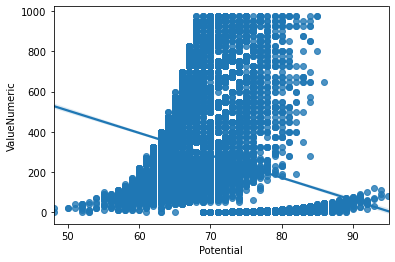

In [26]:
sns.regplot(data = fifa, x = "Potential", y = "ValueNumeric") #I don't see a linear relationship